In [122]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

C:\Users\Windows-10\Anaconda2\envs\discovering-disease-outbreaks\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


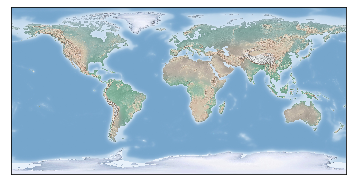

In [131]:
from mpl_toolkits.basemap import Basemap
m = Basemap()
_ = m.shadedrelief()

In [139]:
def plot_clusters(data):
    """
    Plot clustered data on a basemap.
    """
    plt.figure(figsize=(16, 10))
    m.shadedrelief()

    # Iterate through each cluster and plot
    for cluster, grouped in data.groupby("cluster"):
        if cluster == -1:
            # Handle the unassigned headlines
            plt.scatter(
                grouped["lng"],
                grouped["lat"],
                s=60,
                alpha=0.8,
                marker="o",
                label=f"Cluster: None",
                c="k",
            )
        else:
            plt.scatter(
                grouped["lng"],
                grouped["lat"],
                s=60,
                alpha=0.8,
                marker="o",
                label=f"Cluster: {cluster}",
            )

    # Add a legend and title (put legend to right of plot)
    ax = plt.gca()
    ax.legend(loc=(1, 0))
    _ = ax.set_title("Locations of Headlines", size=20)

### Import dataset

In [3]:
dataset = pd.read_csv("data/news_geo_data.csv")

In [4]:
dataset[:10]

,headline,cities,latitude,longitude,countrycode
0,Zika Outbreak Hits Miami,Miami,25.77427,-80.19366,US
1,Could Zika Reach New York City?,New York City,40.71427,-74.00597,US
2,First Case of Zika in Miami Beach,Miami Beach,25.79065,-80.13005,US
3,"Mystery Virus Spreads in Recife, Brazil",Recife,-8.05389,-34.88111,BR
4,Dallas man comes down with case of Zika,Dallas,32.78306,-96.80667,US
5,Trinidad confirms first Zika case,Trinidad,-14.83333,-64.90000,BO
6,Zika Concerns are Spreading in Houston,Houston,29.76328,-95.36327,US
7,Geneve Scientists Battle to Find Cure,Geneve,46.20222,6.14569,CH
8,The CDC in Atlanta is Growing Worried,Atlanta,33.74900,-84.38798,US
9,Zika Infested Monkeys in Sao Paulo,Sao Paulo,-23.54750,-46.63611,BR


In [5]:
coordinates = dataset[["latitude", "longitude"]]

## K-means

### Elbow method to determine K

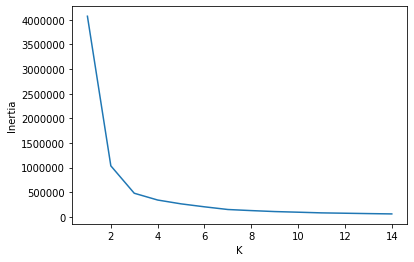

In [30]:
k_values = range(1, 15)
inertia_values = [KMeans(k).fit(coordinates).inertia_
                  for k in k_values]

plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [35]:
km_model = KMeans(n_clusters=6, random_state=0).fit(coordinates)
km_labels = km_model.labels_

In [36]:
km_labels[:10]

array([0, 0, 0, 5, 0, 5, 0, 2, 0, 5])

### Visualizing clusters using k-means on map

In [134]:
latitudes, longitudes = np.array(coordinates).T
df_km = pd.DataFrame({'lat': latitudes, 'lng': longitudes,
                   'cluster': km_labels})

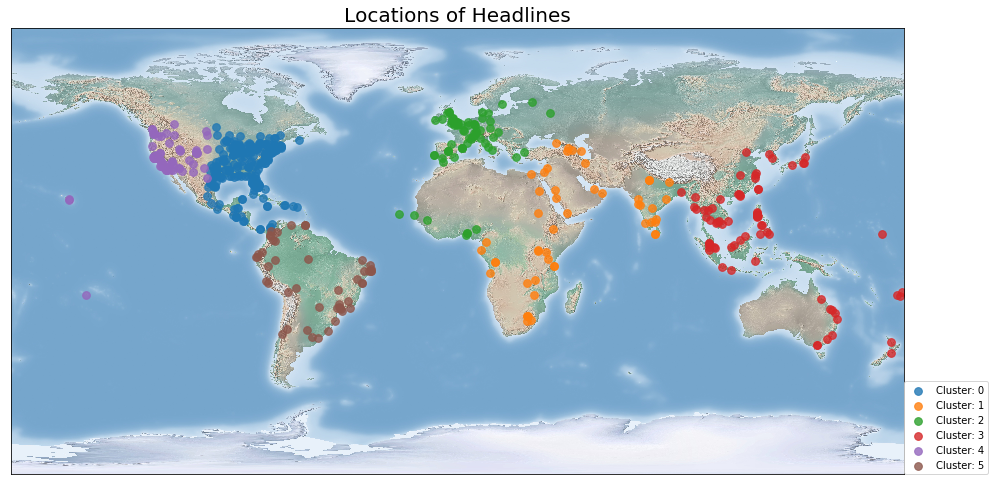

In [149]:
plot_clusters(df_km)

## DBSCAN

In [145]:
db_model = DBSCAN(eps=9, min_samples=3, metric="euclidean").fit((coordinates))
db_labels = db_model.labels_

In [146]:
db_labels[:10]

array([0, 0, 0, 1, 0, 0, 0, 2, 0, 1], dtype=int64)

In [147]:
df_db = pd.DataFrame({'lat': latitudes, 'lng': longitudes,
                   'cluster': db_labels})

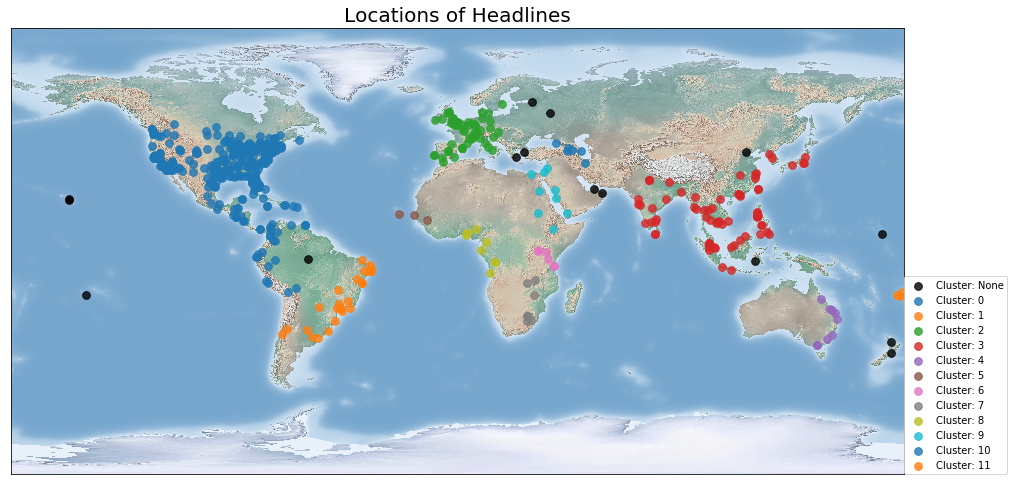

In [148]:
plot_clusters(df_db)

We have noticed that majority of the headlines originate from the United States. Therefore, it makes sense to cluster US headlines seperately from the rest of the world. For now, DBSCAN using Euclidean distance metric seems to provide the most reasonable clusters.